In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trans = pd.read_csv('./data/transactions.csv')
agency = pd.read_csv('./data/agency.csv')
agents = pd.read_csv('./data/agents.csv')

#将三张表连接起来
df = pd.merge(agency, agents)
df = pd.merge(df, trans)

#人为除去无法运算的列
df = df.drop(['Name','FirstName','LastName'], axis = 1)

#重命名列
df.rename(columns = {'X1 transaction date': 'X1','X2 house age': 'X2','X3 distance to the nearest MRT station': 'X3','X4 number of convenience stores': 'X4','X5 latitude': 'X5','X6 longitude': 'X6','Y house price of unit area':'Y'}, inplace=True)

In [3]:
#剔除异常值函数
# def outliers_removed(x):
mean, std = df.mean(), df.std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

df = df[(df['X1'] > lower['X1']) & (df['X1'] < upper['X1'])]
df = df[(df['X2'] > lower['X2']) & (df['X2'] < upper['X2'])]
df = df[(df['X3'] > lower['X3']) & (df['X3'] < upper['X3'])]
df = df[(df['X4'] > lower['X4']) & (df['X4'] < upper['X4'])]
df = df[(df['X5'] > lower['X5']) & (df['X5'] < upper['X5'])]
df = df[(df['X6'] > lower['X6']) & (df['X6'] < upper['X6'])]
df = df[(df['AgencyId'] > lower['AgencyId']) & (df['AgencyId'] < upper['AgencyId'])]
df = df[(df['AgentId'] > lower['AgentId']) & (df['AgentId'] < upper['AgentId'])]
df

,AgencyId,AgentId,X1,X2,X3,X4,X5,X6,Y
0,0,0,2012.667,20.4,2469.64500,4,24.96108,121.51046,23.8
1,0,0,2013.167,16.2,289.32480,5,24.98203,121.54348,46.2
2,0,0,2012.667,29.4,4510.35900,1,24.94925,121.49542,13.2
3,0,0,2012.833,31.7,1160.63200,0,24.94968,121.53009,13.7
4,0,0,2013.583,6.6,90.45606,9,24.97433,121.54310,59.0
...,...,...,...,...,...,...,...,...,...
409,2,4,2012.667,37.1,918.63570,1,24.97198,121.55063,31.9
410,2,4,2013.417,14.7,1717.19300,2,24.96447,121.51649,23.0
411,2,4,2013.000,5.2,2408.99300,0,24.95505,121.55964,22.3
412,2,4,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0


In [4]:
#确定市中心，添加新的距离属性
center_x = sum(df['X5'] * df['Y']) / df['Y'].sum()
center_y = sum(df['X6'] * df['Y']) / df['Y'].sum()
df['X7'] = ((df['X5']-center_x)**2+(df['X6']-center_y)**2)**0.5

#对两个Id列进行one-hot处理
df = pd.get_dummies(df, columns=['AgencyId','AgentId']) 

df.head()

,X1,X2,X3,X4,X5,X6,Y,X7,AgencyId_0,AgencyId_1,AgencyId_2,AgentId_0,AgentId_1,AgentId_2,AgentId_3,AgentId_4,AgentId_5
0,2012.667,20.4,2469.64500,4,24.96108,121.51046,23.8,0.028065,1,0,0,1,0,0,0,0,0
1,2013.167,16.2,289.32480,5,24.98203,121.54348,46.2,0.012641,1,0,0,1,0,0,0,0,0
2,2012.667,29.4,4510.35900,1,24.94925,121.49542,13.2,0.046732,1,0,0,1,0,0,0,0,0
3,2012.833,31.7,1160.63200,0,24.94968,121.53009,13.7,0.022723,1,0,0,1,0,0,0,0,0
4,2013.583,6.6,90.45606,9,24.97433,121.54310,59.0,0.007164,1,0,0,1,0,0,0,0,0


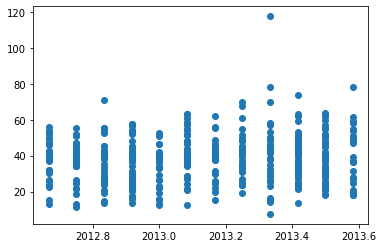

In [5]:
plt.scatter(df['X1'], df['Y']);

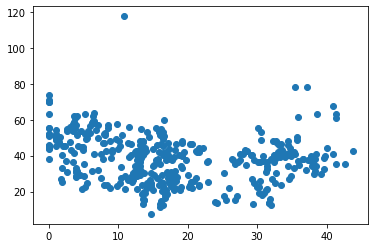

In [6]:
plt.scatter(df['X2'], df['Y']);

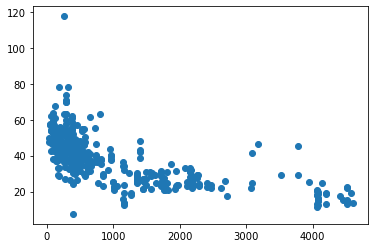

In [7]:
plt.scatter(df['X3'], df['Y']);

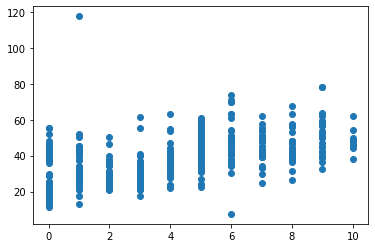

In [8]:
plt.scatter(df['X4'], df['Y']);

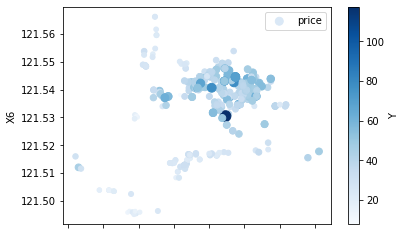

In [9]:
df.plot(kind='scatter',x='X5',y='X6',alpha=1,s=df['Y'], c='Y', label='price', colormap='Blues',colorbar=True)
plt.legend();

In [10]:
import seaborn as sns
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Analyse")\
    .set_precision(2)\
    .set_table_styles(magnify())

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['X3','X4','X7']].copy()
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)
X.head()

X train shape: (306, 3)
X test shape: (102, 3)
y train shape: (306,)
y test shape: (102,)


,X3,X4,X7
0,2469.64500,4,0.028065
1,289.32480,5,0.012641
2,4510.35900,1,0.046732
3,1160.63200,0,0.022723
4,90.45606,9,0.007164


In [ ]:
y.head()

0    23.8
1    46.2
2    13.2
3    13.7
4    59.0
Name: Y, dtype: float64

In [ ]:
#每列归一化处理
X['X3'] = (X['X3']-X['X3'].min())/(X['X3'].max()-X['X3'].min())
X['X4'] = (X['X4']-X['X4'].min())/(X['X4'].max()-X['X4'].min())
X['X7'] = (X['X7']-X['X7'].min())/(X['X7'].max()-X['X7'].min())
X.head()

,X3,X4,X7
0,0.533843,0.4,0.581111
1,0.058036,0.5,0.250637
2,0.979183,0.1,0.981051
3,0.248179,0.0,0.466641
4,0.014637,0.9,0.133301


In [ ]:
def print_mae_train(model, X, y):
    pred = model.predict(X)
    error = np.mean(np.abs(y-pred))
    print("MAE error for train set: {:.1f}".format(error))
def print_mae_test(model, X, y):
    pred = model.predict(X)
    error = np.mean(np.abs(y-pred))
    print("MAE error for test set: {:.1f}".format(error))

def print_mape_train(model, X, y):
    pred = model.predict(X)
    error = np.mean(100 * np.abs((y-pred) / y))
    print("MAPE error for train set: {:.1f}%".format(error))
def print_mape_test(model, X, y):
    pred = model.predict(X)
    error = np.mean(100 * np.abs((y-pred) / y))
    print("MAPE error for test set: {:.1f}%".format(error))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print_mae_train(model, X_train, y_train)
print_mae_test(model, X_test, y_test)
print_mape_train(model, X_train, y_train)
print_mape_test(model, X_test, y_test)
print("Train set accuracy:", model.score(X_train, y_train))
print("Test set accuracy:", model.score(X_test, y_test))


MAE error for train set: 7.2
MAE error for test set: 6.4
MAPE error for train set: 20.4%
MAPE error for test set: 21.5%
Train set accuracy: 0.504394673584891
Test set accuracy: 0.4111634296762771


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(min_samples_leaf=13)
model.fit(X_train,y_train)

print_mae_train(model, X_train, y_train)
print_mae_test(model, X_test, y_test)
print_mape_train(model, X_train, y_train)
print_mape_test(model, X_test, y_test)
print("Train set accuracy:", model.score(X_train, y_train))
print("Test set accuracy:", model.score(X_test, y_test))

MAE error for train set: 5.6
MAE error for test set: 5.1
MAPE error for train set: 15.7%
MAPE error for test set: 17.7%
Train set accuracy: 0.68382256569239
Test set accuracy: 0.5379159441672992
